### Выполнил: - -
Для ввода данных выполните код в нижней ячейке

In [93]:
import math
import random
import scipy.stats as sp
import pandas as pd
from pathlib import Path
import os

x0, n, lmbd = None, None, None

def load_from_csv():
    file_path = Path(os.path.abspath(os.getcwd())+"/data.csv")
    if file_path.is_file():
        return pd.read_csv('data.csv')
    return pd.DataFrame(data= {'x0': [], 'n': [], 'lambda': []})

def save_data(df):
    df.to_csv('data.csv', index=False)
    return df

def load_data():    
    return load_from_csv()

def add_data (df):
    return df.append({'x0': x0, 'n': n, 'lambda': lmbd}, ignore_index=True)
   
input_data_frame = load_data()

while True:
    operation_num = int(input("Введите номер операции: \n1. Ввести самостоятельно x0, n, lambda. \n2. Загрузить из файла.\n"))

    if operation_num == 1:
        n = int(input("Введите n: " ))
        lmbd = float(input("Введите lmbd: "))
        x0 = float(input("Введите x0: "))

        if int(input("Сохранить введенные данные?: \n1. Да \n2. Нет\n")) == 1:
            print("Новое состояние хранилища:\n")
            input_data_frame = save_data(add_data(input_data_frame))
            display(input_data_frame)
        break

    if operation_num == 2:
        display(input_data_frame)
        row_number = int(input("Выберите номер записи или введите -1 для возврата:\n"))
        if row_number >= 0:
            row = input_data_frame.iloc[int(row_number)]
            x0, n, lmbd = float(row["x0"]),int(row["n"]),float(row["lambda"])
            print("Загружено из записи " +str(row_number)+ ":\n")
            break

print("Можно переходить к запуску кода из нижней ячейки")

Введите номер операции: 
1. Ввести самостоятельно x0, n, lambda. 
2. Загрузить из файла.
1
Введите n: 500
Введите lmbd: 0.1
Введите x0: 1
Сохранить введенные данные?: 
1. Да 
2. Нет
2
Можно переходить к запуску кода из нижней ячейки


In [94]:
x, y = [], []

def get_expected_value_theory():
    return 1/lmbd

def get_expected_value_practice():
    #return (1/n)*sum(y)
    return sp.describe(y).mean

def get_err (theory, practice):
    return (abs(theory-practice)/theory)*100

def get_expected_value_err():
    return get_err(get_expected_value_theory(), get_expected_value_practice())

def get_dispersion_theory():
    return 1/(lmbd**2) 

def get_dispersion_practice():
    squared_deviation = []
    for yi in y:
        #squared_deviation.append( abs(yi-get_expected_value_practice()) )
        squared_deviation.append( (yi-get_expected_value_practice())**2 )    
    return sum(squared_deviation)*(1/n)

def get_dispersion_err():
    return get_err(get_dispersion_theory(), get_dispersion_practice())

def get_distribution_theory(x):
    return 1-math.exp((-1)*lmbd*x) if x>0 else 0

def get_interval_count_less_x(x):
    count = 0
    for yi in y:
        if (yi < x):
            count += 1
    return count

def get_distribution_practice(x):
    return get_interval_count_less_x(x)/n

def get_distribution_err(x):
    return abs(get_distribution_theory(x)-get_distribution_practice(x))


def get_y (x):
    return (-1)*(math.log(1-x)/lmbd)


for i in range(0,n):
    x.append(random.randrange(0, 100, 1)/100)
    y.append( get_y(x[-1]) )
    
print("Мат ожидание \n Теория:",get_expected_value_theory(),"; практика:",get_expected_value_practice(),"; отклонение:",get_expected_value_err(),"%")
print("Дисперсия \n Теория:",get_dispersion_theory(),"; практика:",get_dispersion_practice(),"; отклонение:",get_dispersion_err(),"%")
print("Функция распределения \n Теория:",get_distribution_theory(x0),"; практика:",get_distribution_practice(x0),"; отклонение:",get_distribution_err(x0))


Мат ожидание 
 Теория: 10.0 ; практика: 10.097896404332296 ; отклонение: 0.9789640433229607 %
Дисперсия 
 Теория: 99.99999999999999 ; практика: 92.81695797040793 ; отклонение: 7.18304202959206 %
Функция распределения 
 Теория: 0.09516258196404048 ; практика: 0.118 ; отклонение: 0.02283741803595951


### Гистограмма


In [95]:
#распр плотности
def get_density_distribution(x):
    return lmbd*math.exp((-1)*lmbd*x)

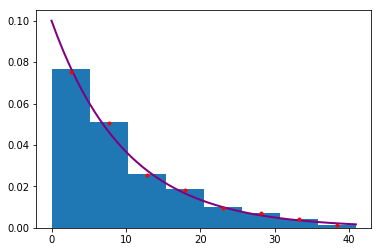

Мера похожести:  3.069421230240663e-05


In [96]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

z = []
frequency_density = []

def get_sturges_digit_count ():
    m = 1.44*math.log(n) + 1
    m = int(m)
    return m

def get_sturges_digit_length():
    m = get_sturges_digit_count ()
    mean_length = max(y)/m
    return mean_length

def get_digits_with_equal_length (y, z, length):    
    mean_length = length
    z.insert(1,0)
    m = max(y)/mean_length
    for i in range(1,int(m)):
        z.insert(i, z[i-1]+mean_length)           

    return z

def get_digit_length (y,z,i):

    if (i < 0) or (i + 1  >= len(z)):
        return False
    
    y_sorted = y[:]
    y_sorted.sort()

    interval = pd.Interval(left=z[i], right=z[i+1], closed = "left")
        
    digit_len = 0
    
    for y_i in (y_sorted):
        if y_i in interval:
            digit_len = digit_len + 1
            
    return digit_len

def get_frequency_density ():
    for i in range(len(z)-1):
        delta_i = z[i+1]-z[i]
        density = get_digit_length(y,z,i)/(n*delta_i)
        frequency_density.insert(i,float(density))

            
get_digits_with_equal_length (y, z, get_sturges_digit_length())
get_frequency_density ()

y_sorted= y[:]
y_sorted.sort()

#new_z = z[1:]
#sns.barplot(x = new_z, y = frequency_density)

plt.figure()
plt.hist(y_sorted,  density = "true", bins = z, )

plot_range = np.arange(z[0],z[-1], 0.01)
plot_y = [get_density_distribution(x) for x in plot_range]
plt.plot(plot_range, plot_y, color='purple', linewidth=2)

fz = [(z[i+1]+z[i])/2 for i in range(len(z)-1)]
plt.plot(fz, frequency_density, color="red",marker = "o",linewidth=0, markersize=3)

plt.show()

#похожесть
def get_measure_of_similarity(): 
    deviations = []
    
    for i in range(len(z)-1):
        average_z = (z[i] + z[i+1])/2
        deviation = (get_density_distribution(average_z) - frequency_density[i])**2
        deviations.append(deviation)
    return sum(deviations)

print("Мера похожести: ", get_measure_of_similarity())


### Часть 3

In [97]:
from scipy.stats import chi2

#degr of freedom
r = len(z) - 1
alpha = 0.05

# R0
def get_measure_of_discrepancy(degry_of_freedom,observed,expected):
    elements = [] 
    for i in range(degry_of_freedom):
        #p_i = get_distribution_theory(z[i+1])-get_distribution_theory(z[i])
        #l_i = get_digit_length(y,z,i)
        #print("i",i,"lambda ",lmbd,"n",n,"x0",x0,"Zi+1",z[i+1],"Z",z[i],"F(Zi+1)",get_distribution_theory(z[i+1]),"F(Z)",get_distribution_theory(z[i]))
        r_0_i = ((observed[i] - expected[i])**2)/expected[i]
        #print(r_0_i)
        elements.append(r_0_i)
        
    return sum(elements)

def test_hypothesis (description, observed,expected):
    print("Проверим гипотезу: \n ",description)
    
    p = 1-alpha 
    quantil_chi2 = chi2.ppf(p, r)
    
    R0 = get_measure_of_discrepancy(r, observed,expected)
    
    print("r степеней свободы: ",r)    
    print("R0, alpha, r = ",R0,",",alpha,",",r)
    
    if R0>=quantil_chi2:
        print("Гипотеза H0 отклоняется \n",R0,">=",quantil_chi2)
    else:
        print("Гипотеза H0 не овтергается \n",R0,"<",quantil_chi2)

In [98]:
hypothesis_description = "H0 – с.в. распределена показательно с параметром lambda = "+str(lmbd)
observed = [get_digit_length(y,z,i) for i in range(r)]
expected = [n*(get_distribution_theory(z[i+1])-get_distribution_theory(z[i])) for i in range(r)]

test_hypothesis (hypothesis_description, observed,expected)

Проверим гипотезу: 
  H0 – с.в. распределена показательно с параметром lambda = 0.1
r степеней свободы:  8
R0, alpha, r =  3.136089277678563 , 0.05 , 8
Гипотеза H0 не овтергается 
 3.136089277678563 < 15.50731305586545


### Часть 4

In [99]:
import collections

tau = []
for i in range(len(y))[1:]:    
    tau.append(sum(y[:i]))
    
t0 = sp.describe(y).mean

tau_z = []
tau_z = get_digits_with_equal_length (tau, tau_z, t0)

m = int(tau[-1]/t0)

count_of_request = []
for i in range(len(tau_z)-1):
    count_of_request.append(get_digit_length(tau,tau_z,i))

request_count_per_holders_interval = collections.Counter(count_of_request)
#print(request_count_per_holders_interval)

table_data = dict(request_count_per_holders_interval)
table_index_order = list(table_data)
table_index_order.sort()
table_series = pd.Series(table_data, index=table_index_order)
#print(series)#,series.index,series.values)

lablels = {'counter': 'Количество заявок', 'counter_freq':'Число интервалов, на которых наблюдалось это число заявок'}
df_data = {lablels['counter']: table_series.index, lablels['counter_freq']: table_series.values}
df = pd.DataFrame(data=df_data)
display(df.T)

,0,1,2,3,4,5
Количество заявок,0,1,2,3,4,5
"Число интервалов, на которых наблюдалось это число заявок",188,180,84,34,10,1


In [100]:
from scipy.stats import poisson
k=max(count_of_request)
m=sum(table_series.values)
r = k

ni = list(table_series.values)

mu=lmbd*t0
mpi = [m*poisson.pmf(ki, mu) for ki in table_series.index]
hypothesis_description = "Н0 – с.в. etta(t0) распределена по закону Пуассона с параметром lambda*t0"
test_hypothesis (hypothesis_description, ni,mpi)

Проверим гипотезу: 
  Н0 – с.в. etta(t0) распределена по закону Пуассона с параметром lambda*t0
r степеней свободы:  5
R0, alpha, r =  1.9269036355766296 , 0.05 , 5
Гипотеза H0 не овтергается 
 1.9269036355766296 < 11.070497693516351
